In [1]:
import numpy as np
import pandas as pd
from IPython.display import display, HTML

In [18]:
#Read excel file
dfs = pd.read_excel('./logs_regression.xlsx')
#dfs = pd.read_excel('./lambda_sweep_06_March_2018.xlsx')
dfs.head()

tmp = dfs.columns.values
tmp[1] = 'data'
dfs.columns = tmp

dfs


,Date,data,hidden,dim,num_classes,loss,lr_init,coeff,coeff_lambda,algorithm,...,CCR1_test,last_iter,ccr_tr_last,ccr_test_last,rmse_tr_last,rmse_test_last,mae_tr.1,mae_test.1,CCR1_tr.1,CCR1_test.1
0,March08 13:43:56,house_16H,"[64, 64, 128, 128, 256, 512, 256, 128, 64, 32,...",16,10,1.0xsingle + 0.0Xmulti,1,mae,0.0,None,...,0.675373,100,0.402974,0.376646,1.891412,1.998298,1.173863,1.264486,0.713776,0.690957
1,March08 13:45:54,house_16H,"[64, 64, 128, 128, 256, 512, 256, 128, 64, 32,...",16,10,1.0xsingle + 0.0Xmulti,1,mae,0.0,None,...,0.703687,100,0.398914,0.379061,1.876750,1.975431,1.172272,1.245610,0.713228,0.697103
2,March08 13:47:49,house_16H,"[64, 64, 128, 128, 256, 512, 256, 128, 64, 32,...",16,10,1.0xsingle + 0.0Xmulti,1,mae,0.0,None,...,0.699956,100,0.401821,0.366769,1.882326,1.917584,1.175344,1.224100,0.708839,0.701932
3,March08 13:49:45,house_16H,"[64, 64, 128, 128, 256, 512, 256, 128, 64, 32,...",16,10,1.0xsingle + 0.0Xmulti,1,mae,0.0,None,...,0.673398,100,0.401492,0.366111,1.885078,1.938984,1.173424,1.244293,0.712295,0.692493
4,March08 13:51:42,house_16H,"[64, 64, 128, 128, 256, 512, 256, 128, 64, 32,...",16,10,1.0xsingle + 0.0Xmulti,1,mae,0.0,None,...,0.704126,100,0.399572,0.371378,1.887420,1.966857,1.178856,1.246927,0.710210,0.701273
5,March08 13:53:38,house_16H,"[64, 64, 128, 128, 256, 512, 256, 128, 64, 32,...",16,10,1.0xsingle + 0.0Xmulti,1,mae,0.1,None,...,0.687445,100,0.399243,0.367647,1.886707,1.999396,1.176167,1.278095,0.710923,0.684372
6,March08 13:55:36,house_16H,"[64, 64, 128, 128, 256, 512, 256, 128, 64, 32,...",16,10,1.0xsingle + 0.0Xmulti,1,mae,0.1,None,...,0.674056,100,0.397981,0.382133,1.894586,1.988774,1.181270,1.249781,0.711033,0.697103
7,March08 13:57:33,house_16H,"[64, 64, 128, 128, 256, 512, 256, 128, 64, 32,...",16,10,1.0xsingle + 0.0Xmulti,1,mae,0.1,None,...,0.702809,100,0.396555,0.378183,1.909585,1.954880,1.193888,1.234636,0.706425,0.699956
8,March08 13:59:31,house_16H,"[64, 64, 128, 128, 256, 512, 256, 128, 64, 32,...",16,10,1.0xsingle + 0.0Xmulti,1,mae,0.1,None,...,0.698420,100,0.393647,0.368086,1.882559,1.908060,1.183574,1.228051,0.707357,0.696225
9,March08 14:01:29,house_16H,"[64, 64, 128, 128, 256, 512, 256, 128, 64, 32,...",16,10,1.0xsingle + 0.0Xmulti,1,mae,0.1,None,...,0.681299,100,0.401053,0.370061,1.869399,2.003837,1.163274,1.264706,0.716410,0.698200


In [19]:
# map weights and losses
map_loss = {'1.0xsingle + 0.0Xmulti': 'SL', '0.0xsingle + 1.0Xmulti': 'ML', 'SL':'SL', 'ML':'ML'}
map_coeff = {'[1]':'CCR','[1, 1, 1]':'CCR1',
              '[ 0.11111111  0.22222222  0.33333333  0.44444444  0.55555556  0.66666667\n  0.77777778  0.88888889  1.          0.88888889  0.77777778  0.66666667\n  0.55555556  0.44444444  0.33333333  0.22222222  0.11111111]':'MAE',
            '[ 0.20987654  0.39506173  0.55555556  0.69135802  0.80246914  0.88888889\n  0.95061728  0.98765432  1.          0.98765432  0.95061728  0.88888889\n  0.80246914  0.69135802  0.55555556  0.39506173  0.20987654]':'MSE',
            'ccr1':'CCR1', 'ccr':'CCR', 'mae':'MAE', 'mse': 'MSE'}
dfs.loss = [map_loss[x] for x in dfs.loss.values]
dfs.coeff = [map_coeff[x] for x in dfs.coeff.values]

dfs.head()

,Date,data,hidden,dim,num_classes,loss,lr_init,coeff,coeff_lambda,algorithm,...,CCR1_test,last_iter,ccr_tr_last,ccr_test_last,rmse_tr_last,rmse_test_last,mae_tr.1,mae_test.1,CCR1_tr.1,CCR1_test.1
0,March08 13:43:56,house_16H,"[64, 64, 128, 128, 256, 512, 256, 128, 64, 32,...",16,10,SL,1,MAE,0.0,None,...,0.675373,100,0.402974,0.376646,1.891412,1.998298,1.173863,1.264486,0.713776,0.690957
1,March08 13:45:54,house_16H,"[64, 64, 128, 128, 256, 512, 256, 128, 64, 32,...",16,10,SL,1,MAE,0.0,None,...,0.703687,100,0.398914,0.379061,1.876750,1.975431,1.172272,1.245610,0.713228,0.697103
2,March08 13:47:49,house_16H,"[64, 64, 128, 128, 256, 512, 256, 128, 64, 32,...",16,10,SL,1,MAE,0.0,None,...,0.699956,100,0.401821,0.366769,1.882326,1.917584,1.175344,1.224100,0.708839,0.701932
3,March08 13:49:45,house_16H,"[64, 64, 128, 128, 256, 512, 256, 128, 64, 32,...",16,10,SL,1,MAE,0.0,None,...,0.673398,100,0.401492,0.366111,1.885078,1.938984,1.173424,1.244293,0.712295,0.692493
4,March08 13:51:42,house_16H,"[64, 64, 128, 128, 256, 512, 256, 128, 64, 32,...",16,10,SL,1,MAE,0.0,None,...,0.704126,100,0.399572,0.371378,1.887420,1.966857,1.178856,1.246927,0.710210,0.701273


In [20]:
'''If algorithm is one of the benchmarks then there is no coeffs and loss'''
dfs_test_ = dfs.copy()

coeffs = []
loss = []
idxs = []
for index, row in dfs_test_.iterrows():
    if(str(row['algorithm']) == ('learn_a') or row['algorithm'] == ('fix_a')
       or row['algorithm'] == ('cheng') or row['algorithm'] == ('poisson')
       or row['algorithm'] == ('binomial')
      or row['algorithm'] == ('fix_a_mae') or row['algorithm'] == ('learn_a_mae')):
        coeff_val = 'None'
        loss_val = 'None'
        idxs.append(index)
    else:
        coeff_val = row['coeff']
        loss_val = row['loss']  
    coeffs.append(coeff_val)
    loss.append(loss_val)
    
dfs_test_.coeff = coeffs
dfs_test_.loss = loss

dfs_test_

,Date,data,hidden,dim,num_classes,loss,lr_init,coeff,coeff_lambda,algorithm,...,CCR1_test,last_iter,ccr_tr_last,ccr_test_last,rmse_tr_last,rmse_test_last,mae_tr.1,mae_test.1,CCR1_tr.1,CCR1_test.1
0,March08 13:43:56,house_16H,"[64, 64, 128, 128, 256, 512, 256, 128, 64, 32,...",16,10,SL,1,MAE,0.0,None,...,0.675373,100,0.402974,0.376646,1.891412,1.998298,1.173863,1.264486,0.713776,0.690957
1,March08 13:45:54,house_16H,"[64, 64, 128, 128, 256, 512, 256, 128, 64, 32,...",16,10,SL,1,MAE,0.0,None,...,0.703687,100,0.398914,0.379061,1.876750,1.975431,1.172272,1.245610,0.713228,0.697103
2,March08 13:47:49,house_16H,"[64, 64, 128, 128, 256, 512, 256, 128, 64, 32,...",16,10,SL,1,MAE,0.0,None,...,0.699956,100,0.401821,0.366769,1.882326,1.917584,1.175344,1.224100,0.708839,0.701932
3,March08 13:49:45,house_16H,"[64, 64, 128, 128, 256, 512, 256, 128, 64, 32,...",16,10,SL,1,MAE,0.0,None,...,0.673398,100,0.401492,0.366111,1.885078,1.938984,1.173424,1.244293,0.712295,0.692493
4,March08 13:51:42,house_16H,"[64, 64, 128, 128, 256, 512, 256, 128, 64, 32,...",16,10,SL,1,MAE,0.0,None,...,0.704126,100,0.399572,0.371378,1.887420,1.966857,1.178856,1.246927,0.710210,0.701273
5,March08 13:53:38,house_16H,"[64, 64, 128, 128, 256, 512, 256, 128, 64, 32,...",16,10,SL,1,MAE,0.1,None,...,0.687445,100,0.399243,0.367647,1.886707,1.999396,1.176167,1.278095,0.710923,0.684372
6,March08 13:55:36,house_16H,"[64, 64, 128, 128, 256, 512, 256, 128, 64, 32,...",16,10,SL,1,MAE,0.1,None,...,0.674056,100,0.397981,0.382133,1.894586,1.988774,1.181270,1.249781,0.711033,0.697103
7,March08 13:57:33,house_16H,"[64, 64, 128, 128, 256, 512, 256, 128, 64, 32,...",16,10,SL,1,MAE,0.1,None,...,0.702809,100,0.396555,0.378183,1.909585,1.954880,1.193888,1.234636,0.706425,0.699956
8,March08 13:59:31,house_16H,"[64, 64, 128, 128, 256, 512, 256, 128, 64, 32,...",16,10,SL,1,MAE,0.1,None,...,0.698420,100,0.393647,0.368086,1.882559,1.908060,1.183574,1.228051,0.707357,0.696225
9,March08 14:01:29,house_16H,"[64, 64, 128, 128, 256, 512, 256, 128, 64, 32,...",16,10,SL,1,MAE,0.1,None,...,0.681299,100,0.401053,0.370061,1.869399,2.003837,1.163274,1.264706,0.716410,0.698200


In [21]:
'''If algorithm is one of the benchmarks then there is no coeffs and loss'''
dfs_test_ = dfs.copy()

coeffs_lambda = []
loss = []
idxs = []
for index, row in dfs_test_.iterrows():
    if(row['coeff_lambda']==-1):
        if(str(row['coeff']) == ('CCR')):
           coeffs_lambda.append(0)
        else:
           coeffs_lambda.append(1)
    else:
           coeffs_lambda.append(row['coeff_lambda'])
           
dfs_test_.coeff_lambda = coeffs_lambda
dfs_test_

,Date,data,hidden,dim,num_classes,loss,lr_init,coeff,coeff_lambda,algorithm,...,CCR1_test,last_iter,ccr_tr_last,ccr_test_last,rmse_tr_last,rmse_test_last,mae_tr.1,mae_test.1,CCR1_tr.1,CCR1_test.1
0,March08 13:43:56,house_16H,"[64, 64, 128, 128, 256, 512, 256, 128, 64, 32,...",16,10,SL,1,MAE,0.0,None,...,0.675373,100,0.402974,0.376646,1.891412,1.998298,1.173863,1.264486,0.713776,0.690957
1,March08 13:45:54,house_16H,"[64, 64, 128, 128, 256, 512, 256, 128, 64, 32,...",16,10,SL,1,MAE,0.0,None,...,0.703687,100,0.398914,0.379061,1.876750,1.975431,1.172272,1.245610,0.713228,0.697103
2,March08 13:47:49,house_16H,"[64, 64, 128, 128, 256, 512, 256, 128, 64, 32,...",16,10,SL,1,MAE,0.0,None,...,0.699956,100,0.401821,0.366769,1.882326,1.917584,1.175344,1.224100,0.708839,0.701932
3,March08 13:49:45,house_16H,"[64, 64, 128, 128, 256, 512, 256, 128, 64, 32,...",16,10,SL,1,MAE,0.0,None,...,0.673398,100,0.401492,0.366111,1.885078,1.938984,1.173424,1.244293,0.712295,0.692493
4,March08 13:51:42,house_16H,"[64, 64, 128, 128, 256, 512, 256, 128, 64, 32,...",16,10,SL,1,MAE,0.0,None,...,0.704126,100,0.399572,0.371378,1.887420,1.966857,1.178856,1.246927,0.710210,0.701273
5,March08 13:53:38,house_16H,"[64, 64, 128, 128, 256, 512, 256, 128, 64, 32,...",16,10,SL,1,MAE,0.1,None,...,0.687445,100,0.399243,0.367647,1.886707,1.999396,1.176167,1.278095,0.710923,0.684372
6,March08 13:55:36,house_16H,"[64, 64, 128, 128, 256, 512, 256, 128, 64, 32,...",16,10,SL,1,MAE,0.1,None,...,0.674056,100,0.397981,0.382133,1.894586,1.988774,1.181270,1.249781,0.711033,0.697103
7,March08 13:57:33,house_16H,"[64, 64, 128, 128, 256, 512, 256, 128, 64, 32,...",16,10,SL,1,MAE,0.1,None,...,0.702809,100,0.396555,0.378183,1.909585,1.954880,1.193888,1.234636,0.706425,0.699956
8,March08 13:59:31,house_16H,"[64, 64, 128, 128, 256, 512, 256, 128, 64, 32,...",16,10,SL,1,MAE,0.1,None,...,0.698420,100,0.393647,0.368086,1.882559,1.908060,1.183574,1.228051,0.707357,0.696225
9,March08 14:01:29,house_16H,"[64, 64, 128, 128, 256, 512, 256, 128, 64, 32,...",16,10,SL,1,MAE,0.1,None,...,0.681299,100,0.401053,0.370061,1.869399,2.003837,1.163274,1.264706,0.716410,0.698200


In [22]:
# Drop the unnecessary colums

dfs_test = dfs_test_.drop(['Date',  'hidden', 'dim' , 'num_classes', 
                      'Number of iter', 'loss_tr', 'loss_test', 'CCR_tr', 'CCR_test',
                      'rmse_tr', 'rmse_test', 'mae_tr', 'mae_test', 'CCR1_tr', 'CCR1_test',
                      'last_iter', 'CCR1_tr.1', 'ccr_tr_last', 'mae_tr.1', 'rmse_tr_last'  ], axis=1)


#dfs_simple.head()

#dfs_test = dfs_simple.drop(dfs_simple.columns[3:15], axis=1)

dfs_benchmark = pd.DataFrame({'data':['call_housing', 'call_housing', 'boston_housing', 'boston_housing',
                                      'cpu_act', 'cpu_act', 'house_16h', 'house_16h'],
                              'loss':['Benchmark' for k in range(8)],
                              'coeff':['None' for k in range(8)],
                             'ccr_test_last':[.281, .304, .394, .458, .372, .473, .187, .251],
                            'mae_test.1':[1.40, 1.23, 2.87, .54, 1.05, .74, 2., 1.50],
                              'algorithm':['NN', 'Best', 'NN', 'Best', 'NN', 'Best', 'NN', 'Best']
                         })

dfs_test_w_benchmark = dfs_test.append(dfs_benchmark)

map_data = {'house_16h': 'house_16h (census10\' - CEE10)', 'house_16H': 'house_16h (census10\' - CEE10)',
            'cpu_act':'cpu_act (computer10\' - CC10)',
            'boston_housing':'boston_housing (H10)', 'call_housing': 'call_housing (CH10)','cal_housing': 'call_housing (CH10)'}
dfs_test.data = [map_data[x] for x in dfs_test.data.values]
dfs_test_w_benchmark.data = [map_data[x] for x in dfs_test_w_benchmark.data.values]

dfs_test_NN = dfs_test.drop(idxs)
dfs_test_w_benchmark

,CCR1_test.1,algorithm,ccr_test_last,coeff,coeff_lambda,data,loss,lr_init,mae_test.1,rmse_test_last
0,0.690957,None,0.376646,MAE,0.0,house_16h (census10' - CEE10),SL,1.0,1.264486,1.998298
1,0.697103,None,0.379061,MAE,0.0,house_16h (census10' - CEE10),SL,1.0,1.245610,1.975431
2,0.701932,None,0.366769,MAE,0.0,house_16h (census10' - CEE10),SL,1.0,1.224100,1.917584
3,0.692493,None,0.366111,MAE,0.0,house_16h (census10' - CEE10),SL,1.0,1.244293,1.938984
4,0.701273,None,0.371378,MAE,0.0,house_16h (census10' - CEE10),SL,1.0,1.246927,1.966857
5,0.684372,None,0.367647,MAE,0.1,house_16h (census10' - CEE10),SL,1.0,1.278095,1.999396
6,0.697103,None,0.382133,MAE,0.1,house_16h (census10' - CEE10),SL,1.0,1.249781,1.988774
7,0.699956,None,0.378183,MAE,0.1,house_16h (census10' - CEE10),SL,1.0,1.234636,1.954880
8,0.696225,None,0.368086,MAE,0.1,house_16h (census10' - CEE10),SL,1.0,1.228051,1.908060
9,0.698200,None,0.370061,MAE,0.1,house_16h (census10' - CEE10),SL,1.0,1.264706,2.003837


In [23]:
dfs_test_mean = dfs_test.groupby(['data', 'algorithm', 'loss', 'coeff', 'coeff_lambda', 'lr_init']).mean()

#Negate the rmse and mae columns
print(dfs_test_mean.columns[2:6])
dfs_test_mean[['mae_test.1', 'rmse_test_last']] = -dfs_test_mean[['mae_test.1', 'rmse_test_last']].values
dfs_test_mean = dfs_test_mean.groupby(['data', 'algorithm', 'loss', 'coeff_lambda', 'coeff']).max()

dfs_test_NN_mean = dfs_test_NN.groupby(['data', 'algorithm', 'loss', 'coeff', 'coeff_lambda', 'lr_init']).mean()

#Negate the rmse and mae columns
dfs_test_NN_mean[['mae_test.1', 'rmse_test_last']] = -dfs_test_NN_mean[['mae_test.1', 'rmse_test_last']].values
#dfs_test_NN_mean = dfs_test_NN_mean.groupby(['data', 'algorithm', 'loss', 'coeff', 'coeff_lambda']).max()

dfs_test_w_benchmark_mean = dfs_test_w_benchmark.groupby(['data', 'algorithm', 'loss', 'coeff', 'lr_init']).mean()
#Negate the rmse and mae columns
dfs_test_w_benchmark_mean[['mae_test.1', 'rmse_test_last']] = -dfs_test_w_benchmark_mean[['mae_test.1', 'rmse_test_last']].values

dfs_test_w_benchmark_mean = dfs_test_w_benchmark_mean.groupby(['data', 'algorithm', 'loss', 'coeff']).max()
dfs_test_NN_mean

Index(['mae_test.1', 'CCR1_test.1'], dtype='object')


ccr_test_last  \
data                          algorithm loss coeff coeff_lambda lr_init                  
house_16h (census10' - CEE10) None      ML   MAE   0.0          1             0.367867   
                                                   0.1          1             0.367471   
                                                   0.2          1             0.365803   
                                                   0.3          1             0.365716   
                                                   0.4          1             0.367691   
                                                   0.5          1             0.365935   
                                                   0.6          1             0.362335   
                                                   0.7          1             0.360623   
                                                   0.8          1             0.358867   
                                                   0.9          1             0.353775   
                                                   1.0          1             0.339421   
                                        SL   MAE   0.0          1             0.371993   
                                                   0.1          1             0.373222   
                                                   0.2          1             0.371598   
                                                   0.3          1             0.372169   
                                                   0.4          1             0.370939   
                                                   0.5          1             0.369535   
                                                   0.6          1             0.368174   
                                                   0.7          1             0.365364   
                                                   0.8          1             0.362379   
                                                   0.9          1             0.360579   
                                                   1.0          1             0.353951   

                                                                         rmse_test_last  \
data                          algorithm loss coeff coeff_lambda lr_init                   
house_16h (census10' - CEE10) None      ML   MAE   0.0          1             -2.018159   
                                                   0.1          1             -1.981535   
                                                   0.2          1             -1.951453   
                                                   0.3          1             -1.916978   
                                                   0.4          1             -1.881482   
                                                   0.5          1             -1.860659   
                                                   0.6          1             -1.847513   
                                                   0.7          1             -1.821554   
                                                   0.8          1             -1.799979   
                                                   0.9          1             -1.780535   
                                                   1.0          1             -1.740864   
                                        SL   MAE   0.0          1             -1.959431   
                                                   0.1          1             -1.970990   
                                                   0.2          1             -1.971535   
                                                   0.3          1             -1.981150   
                                                   0.4          1             -1.968230   
                                                   0.5          1             -1.962119   
                                                   0.6          1             -1.958385   
                                                   0.7          1             -1.945285   
 

In [32]:
def highlight_max(data, color='yellow'):
    '''
    highlight the maximum in a Series or DataFrame
    '''
    attr = 'background-color: {}'.format(color)
    #remove % and cast to float
    data = data.replace('%','', regex=True).astype(float)
    if data.ndim == 1:  # Series from .apply(axis=0) or axis=1
        is_max = data == data.max()
        return [attr if v else '' for v in is_max]
    else:  # from .apply(axis=None)
        is_max = data == data.max().max()
        return pd.DataFrame(np.where(is_max, attr, ''),
                            index=data.index, columns=data.columns)

In [24]:
dfs_test_mean_by_data = dfs_test_NN_mean.groupby(['data'])

g = dfs_test_mean_by_data.get_group('house_16h (census10\' - CEE10)')
display(g)
'''If algorithm is one of the benchmarks then there is no coeffs and loss'''
ccr = np.zeros((11,4))
ccr1 = np.zeros((11,4))
mae = np.zeros((11,4))
rmse = np.zeros((11,4))

for index, row in g.iterrows():
    #print(row)
    if(str(index[3])=='CCR'):
        if(str(index[2])=='SL'):
            ccr[0,:2] = row['ccr_test_last']
            ccr1[0,:2] = row['CCR1_test.1']
            mae[0,:2] = row['mae_test.1']
            rmse[0,:2] = row['rmse_test_last']
        else:
            ccr[0,2:] = row['ccr_test_last']
            ccr1[0,2:] = row['CCR1_test.1']
            mae[0,2:] = row['mae_test.1']
            rmse[0,2:] = row['rmse_test_last']
    else:
        i = int(index[4]*10)
        j1 = int(str(index[2])=='ML')
        j2 = int(str(index[3])=='MAE')
        j = 2*j1+j2
        ccr[i,j] = row['ccr_test_last']
        ccr1[i,j] = row['CCR1_test.1']
        mae[i,j] = row['mae_test.1']
        rmse[i,j] = row['rmse_test_last']
        

ccr_test_last  \
data                          algorithm loss coeff coeff_lambda lr_init                  
house_16h (census10' - CEE10) None      ML   MAE   0.0          1             0.367867   
                                                   0.1          1             0.367471   
                                                   0.2          1             0.365803   
                                                   0.3          1             0.365716   
                                                   0.4          1             0.367691   
                                                   0.5          1             0.365935   
                                                   0.6          1             0.362335   
                                                   0.7          1             0.360623   
                                                   0.8          1             0.358867   
                                                   0.9          1             0.353775   
                                                   1.0          1             0.339421   
                                        SL   MAE   0.0          1             0.371993   
                                                   0.1          1             0.373222   
                                                   0.2          1             0.371598   
                                                   0.3          1             0.372169   
                                                   0.4          1             0.370939   
                                                   0.5          1             0.369535   
                                                   0.6          1             0.368174   
                                                   0.7          1             0.365364   
                                                   0.8          1             0.362379   
                                                   0.9          1             0.360579   
                                                   1.0          1             0.353951   

                                                                         rmse_test_last  \
data                          algorithm loss coeff coeff_lambda lr_init                   
house_16h (census10' - CEE10) None      ML   MAE   0.0          1             -2.018159   
                                                   0.1          1             -1.981535   
                                                   0.2          1             -1.951453   
                                                   0.3          1             -1.916978   
                                                   0.4          1             -1.881482   
                                                   0.5          1             -1.860659   
                                                   0.6          1             -1.847513   
                                                   0.7          1             -1.821554   
                                                   0.8          1             -1.799979   
                                                   0.9          1             -1.780535   
                                                   1.0          1             -1.740864   
                                        SL   MAE   0.0          1             -1.959431   
                                                   0.1          1             -1.970990   
                                                   0.2          1             -1.971535   
                                                   0.3          1             -1.981150   
                                                   0.4          1             -1.968230   
                                                   0.5          1             -1.962119   
                                                   0.6          1             -1.958385   
                                                   0.7          1             -1.945285   
 

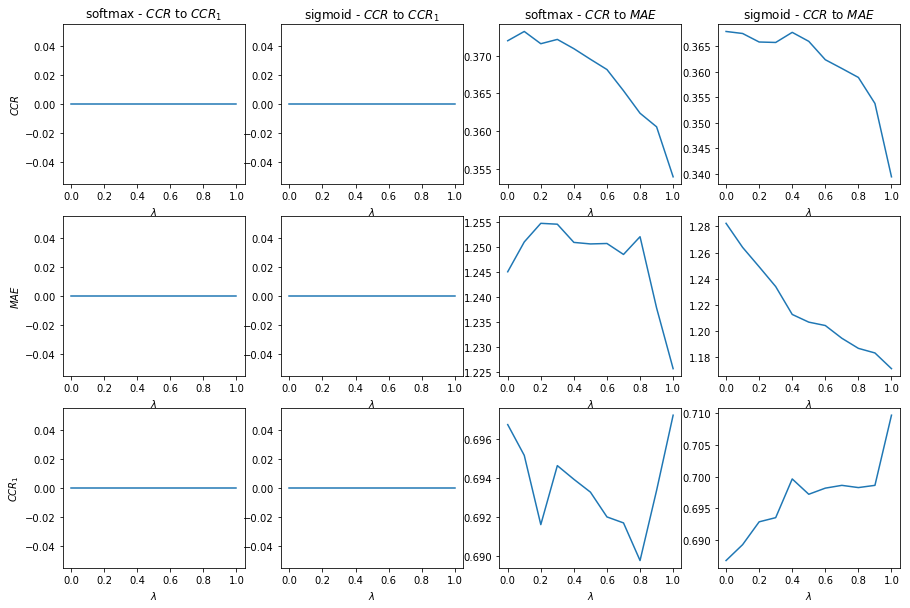

In [25]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.figure(figsize=(15,10))
lmbdas = [0.1*k for k in range(11)]
plt.subplot(3,4,1)
plt.plot(lmbdas, ccr[:,0])
plt.xlabel('$\lambda$')
plt.ylabel('$CCR$')
plt.title('softmax - $CCR$ to $CCR_1$')
plt.subplot(3,4,2)
plt.plot(lmbdas, ccr[:,2])
plt.xlabel('$\lambda$')
plt.title('sigmoid - $CCR$ to $CCR_1$')
plt.subplot(3,4,3)
plt.plot(lmbdas, ccr[:,1])
plt.xlabel('$\lambda$')
plt.title('softmax - $CCR$ to $MAE$')
plt.subplot(3,4,4)
plt.plot(lmbdas, ccr[:,3])
plt.xlabel('$\lambda$')
plt.title('sigmoid - $CCR$ to $MAE$')


plt.subplot(3,4,5)
plt.plot(lmbdas, -mae[:,0])
plt.xlabel('$\lambda$')
plt.ylabel('$MAE$')
plt.subplot(3,4,6)
plt.plot(lmbdas, -mae[:,2])
plt.xlabel('$\lambda$')
plt.subplot(3,4,7)
plt.plot(lmbdas, -mae[:,1])
plt.xlabel('$\lambda$')
plt.subplot(3,4,8)
plt.plot(lmbdas, -mae[:,3])
plt.xlabel('$\lambda$')

plt.subplot(3,4,9)
plt.plot(lmbdas, ccr1[:,0])
plt.xlabel('$\lambda$')
plt.ylabel('$CCR_1$')
plt.subplot(3,4,10)
plt.plot(lmbdas, ccr1[:,2])
plt.xlabel('$\lambda$')
plt.subplot(3,4,11)
plt.plot(lmbdas, ccr1[:,1])
plt.xlabel('$\lambda$')
plt.subplot(3,4,12)
plt.plot(lmbdas, ccr1[:,3])
plt.xlabel('$\lambda$')

In [36]:
from IPython.display import display, HTML

dfs_test_mean_by_data = dfs_test_NN_mean.groupby(['data'])

for data, group in dfs_test_mean_by_data:
    display(group)
    #display(group.style.apply(highlight_max))
    


ccr_test_last  \
data                 algorithm loss coeff coeff_lambda lr_init                  
boston_housing (H10) None      ML   CCR   0.0          1             0.405941   
                                    CCR1  0.1          1             0.423762   
                                          0.2          1             0.443564   
                                          0.3          1             0.447525   
                                          0.4          1             0.453465   
                                          0.5          1             0.469307   
                                          0.6          1             0.469307   
                                          0.7          1             0.479208   
                                          0.8          1             0.447525   
                                          0.9          1             0.443564   
                                          1.0          1             0.396040   
                                    MAE   1.0          1             0.384158   
                               SL   CCR   0.0          1             0.423762   
                                    CCR1  0.1          1             0.437624   
                                          0.2          1             0.421782   
                                          0.3          1             0.427723   
                                          0.4          1             0.457426   
                                          0.5          1             0.447525   
                                          0.6          1             0.447525   
                                          0.7          1             0.473267   
                                          0.8          1             0.447525   
                                          0.9          1             0.439604   
                                          1.0          1             0.451485   
                                    MAE   1.0          1             0.348515   

                                                                rmse_test_last  \
data                 algorithm loss coeff coeff_lambda lr_init                   
boston_housing (H10) None      ML   CCR   0.0          1             -1.423836   
                                    CCR1  0.1          1             -1.362496   
                                          0.2          1             -1.345696   
                                          0.3          1             -1.304478   
                                          0.4          1             -1.301959   
                                          0.5          1             -1.251289   
                                          0.6          1             -1.228840   
                                          0.7          1             -1.206243   
                                          0.8          1             -1.221167   
                                          0.9          1             -1.224435   
                                          1.0          1             -1.222751   
                                    MAE   1.0          1             -1.236302   
                               SL   CCR   0.0          1             -1.385983   
                                    CCR1  0.1          1             -1.404705   
                                          0.2          1             -1.334055   
                                          0.3          1             -1.365267   
                                          0.4          1             -1.273460   
                                          0.5          1             -1.327220   
                                          0.6          1             -1.344911   
                                          0.7          1             -1.306908   
                                          0.8          1             -1.302432   
                                          0.9          1             -1

ccr_test_last  \
data                algorithm loss coeff coeff_lambda lr_init                  
call_housing (CH10) None      ML   CCR   0.0          1             0.416764   
                                   CCR1  0.1          1             0.416473   
                                         0.2          1             0.416764   
                                         0.3          1             0.414244   
                                         0.4          1             0.417006   
                                         0.5          1             0.417587   
                                         0.6          1             0.418508   
                                         0.7          1             0.415891   
                                         0.8          1             0.406928   
                                         0.9          1             0.398304   
                                         1.0          1             0.318411   
                                   MAE   0.1          1             0.408624   
                                         0.2          1             0.404797   
                                         0.3          1             0.404603   
                                         0.4          1             0.406153   
                                         0.5          1             0.407025   
                                         0.6          1             0.405233   
                                         0.7          1             0.402374   
                                         0.8          1             0.396657   
                                         0.9          1             0.394961   
                                         1.0          1             0.385901   
                              SL   CCR   0.0          1             0.414890   
                                   CCR1  0.1          1             0.419525   
                                         0.2          1             0.417054   
                                         0.3          1             0.415795   
                                         0.4          1             0.413517   
                                         0.5          1             0.412452   
                                         0.6          1             0.407607   
                                         0.7          1             0.403973   
                                         0.8          1             0.398692   
                                         0.9          1             0.380426   
                                         1.0          1             0.361192   
                                   MAE   0.1          1             0.404118   
                                         0.2          1             0.392345   
                                         0.3          1             0.381541   
                                         0.4          1             0.377859   
                                         0.5          1             0.373110   
                                         0.6          1             0.371076   
                                         0.7          1             0.371560   
                                         0.8          1             0.368217   
                                         0.9          1             0.367587   
                                         1.0          1             0.357752   

                                                               rmse_test_last  \
data                algorithm loss coeff coeff_lambda lr_init                   
call_housing (CH10) None      ML   CCR   0.0          1             -1.526176   
                                   CCR1  0.1          1             -1.508223   
                                         0.2          1             -1.500562   
                                         0.3          1             -1.483014   
                                         0.4          1 

ccr_test_last  \
data                         algorithm loss coeff coeff_lambda lr_init                  
cpu_act (computer10' - CC10) None      ML   CCR   0.0          1             0.533211   
                                            CCR1  0.1          1             0.533578   
                                                  0.2          1             0.538339   
                                                  0.3          1             0.539560   
                                                  0.4          1             0.535897   
                                                  0.5          1             0.533578   
                                                  0.6          1             0.524176   
                                                  0.7          1             0.525641   
                                                  0.8          1             0.484615   
                                                  0.9          1             0.428571   
                                                  1.0          1             0.344689   
                                            MAE   1.0          1             0.491453   
                                       SL   CCR   0.0          1             0.537851   
                                            CCR1  0.1          1             0.537363   
                                                  0.2          1             0.537241   
                                                  0.3          1             0.540049   
                                                  0.4          1             0.536630   
                                                  0.5          1             0.535531   
                                                  0.6          1             0.534066   
                                                  0.7          1             0.531502   
                                                  0.8          1             0.524298   
                                                  0.9          1             0.519292   
                                                  1.0          1             0.481197   
                                            MAE   1.0          1             0.499512   

                                                                        rmse_test_last  \
data                         algorithm loss coeff coeff_lambda lr_init                   
cpu_act (computer10' - CC10) None      ML   CCR   0.0          1             -1.025499   
                                            CCR1  0.1          1             -1.017216   
                                                  0.2          1             -1.005474   
                                                  0.3          1             -1.002595   
                                                  0.4          1             -0.990642   
                                                  0.5          1             -0.979016   
                                                  0.6          1             -0.996210   
                                                  0.7          1             -0.977301   
                                                  0.8          1             -1.040633   
                                                  0.9          1             -1.344455   
                                                  1.0          1             -1.396190   
                                            MAE   1.0          1             -0.995323   
                                       SL   CCR   0.0          1             -1.010117   
                                            CCR1  0.1          1             -1.002980   
                                                  0.2          1             -0.991935   
                                                  0.3          1             -0.985108   
                                                  0.4          1             -0.982914   
                                               

ccr_test_last  \
data                          algorithm loss coeff coeff_lambda lr_init                  
house_16h (census10' - CEE10) None      ML   CCR   0.0          1             0.365057   
                                             CCR1  0.1          1             0.370852   
                                                   0.2          1             0.370413   
                                                   0.3          1             0.368218   
                                                   0.4          1             0.364881   
                                                   0.5          1             0.359526   
                                                   0.6          1             0.355136   
                                                   0.7          1             0.345347   
                                                   0.8          1             0.325417   
                                                   0.9          1             0.294996   
                                                   1.0          1             0.251361   
                                             MAE   0.1          1             0.367779   
                                                   0.2          1             0.366242   
                                                   0.3          1             0.364442   
                                                   0.4          1             0.368876   
                                                   0.5          1             0.367471   
                                                   0.6          1             0.365452   
                                                   0.7          1             0.365628   
                                                   0.8          1             0.360272   
                                                   0.9          1             0.351580   
                                                   1.0          1             0.339991   
                                        SL   CCR   0.0          1             0.371159   
                                             CCR1  0.1          1             0.371905   
                                                   0.2          1             0.375505   
                                                   0.3          1             0.371335   
                                                   0.4          1             0.369096   
                                                   0.5          1             0.364574   
                                                   0.6          1             0.356146   
                                                   0.7          1             0.343152   
                                                   0.8          1             0.327349   
                                                   0.9          1             0.304565   
                                                   1.0          1             0.286567   
                                             MAE   0.1          1             0.370852   
                                                   0.2          1             0.366023   
                                                   0.3          1             0.361106   
                                                   0.4          1             0.355575   
                                                   0.5          1             0.349122   
                                                   0.6          1             0.347059   
                                                   0.7          1             0.346444   
                                                   0.8          1             0.338104   
                                                   0.9          1             0.337796   
                                                   1.0          1             0.318349   

                                                                         rmse_test_last  \
data                 

In [12]:


dfs_test_mean_by_data = dfs_test_NN_mean.groupby(['data'])

for data, group in dfs_test_mean_by_data:
    display(group.style.apply(highlight_max))
    
